In [1]:
#using DataFrames
using Random, Distributions, Statistics, Plots, DifferentialEquations

In [2]:
Threads.@threads for i in 1:Threads.nthreads()
    println(Threads.threadid())
end # end for
Random.seed!(1234);

1


### Hiring problem

Let $\theta\sim b(p)$ and:
$$g(t,\theta)=\begin{cases}
    -e^{-rt}c & \text{ if }\theta = 0\\
    e^{-rt}d & \text{ if }\theta = 1
\end{cases}$$
suppose we observe process:
$$d\xi_{t}=\theta dt+\sigma dW_{t};\xi_{0}=0$$
with known $\sigma\in\mathbb{R}$, and $\theta$ being unobserved.

We want to maximize via conice of stopping time $\tau$ the quantity:
$$V(\tau)=\mathbb{E}\left[g(t,\theta)\mathbb{1}_{\{\tau<\gamma\}}\right]=
\mathbb{E}\left[e^{-r\tau}(d\mathbb{1}_{\{\theta=1\}}-c\mathbb{1}_{\{\theta=0\}})\mathbb{1}_{\{\tau<\gamma\}}\right]$$
where random variable $\gamma$ is independent of $\xi$ and:
$$\mathbb{P}\left[\gamma>t|\theta\right]=\exp(-(1+\mathbb{1}_{\{\theta=1\}})t)$$
the problem reduces to maximising:
$$\text{TODO}$$
where $\omega=\sigma^{-1}, b=\dfrac{c\gamma}{d(\gamma-1)}$ and $\gamma$ being a (positive) solution to:
$$\frac{1}{2\sigma^{2}}\gamma\left(\gamma-1\right)-\gamma-r-1=0$$
an optimal $\mathcal{F}^{\xi}$ measurable choice for $\tau$ is then:
$$\tau=\inf_{t}\left\{t:\xi_{t}>\sigma^{2}\left(\ln(b)-\ln(p)+\ln(1-p)+t\right)+\frac{1}{2}t\right\}$$

In [3]:
Δₜ = 1 / 100
time = (1:100) / 100

mmm = function (x)
    if length(x) == 0
        return Inf
    else
        return minimum(x)
    end # end if
end # end function

#4 (generic function with 1 method)

In [4]:
σ = -.5

r = .2
c = 1
d = 1

g(t, θ) = d * exp(-r * t) * θ - c * exp(-r * t) * (1 - θ)
γ₁ = (1 + 2 * σ ^ 2 + sqrt(4 * (2 * r + 3) * σ ^ 2 + 1 + 4 * σ ^ 4))

b = c * γ₁ / (d * (γ₁ - 1))

1.3764513330192687

In [5]:
τ = []
V = []

for k in 1:10000
    dW = [0.0]
    append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
    W = cumsum(dW)
    
    θ = rand(Bernoulli(1 / 2))
    γ = rand(Exponential(1 + θ))
    
    ξ = [0.0]
    for k in 2:length(time)
        append!(ξ, ξ[end] + θ * Δₜ + σ * dW[k])
    end # end for
    push!(τ, mmm(time[ξ .> σ ^ 2 .* (log(b) .+ time) .+ time ./ 2]))
    if τ[end] < Inf
        push!(V, g(τ[end], θ) * (τ[end] < γ))
    else
        push!(V, 0)
    end 
end

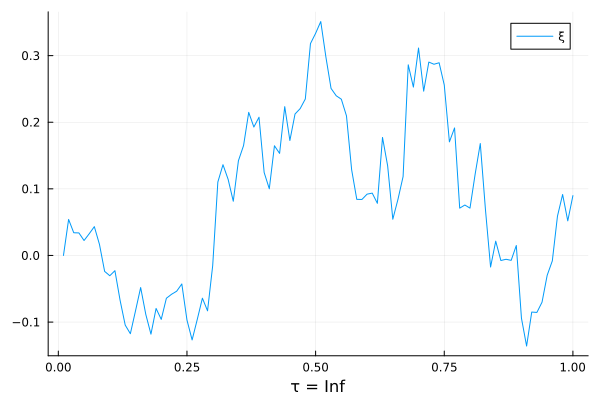

In [6]:
dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)

θ = rand(Bernoulli(1 / 2))
γ = rand(Exponential(1 + θ))

ξ = [0.0]
for k in 2:length(time)
    append!(ξ, ξ[end] + θ * Δₜ + σ * dW[k])
end # end for

plot(time, ξ, label = "ξ")
xlabel!("τ = $(mmm(time[ξ .> σ ^ 2 .* (log(b) .+ time) .+ time ./ 2]))")

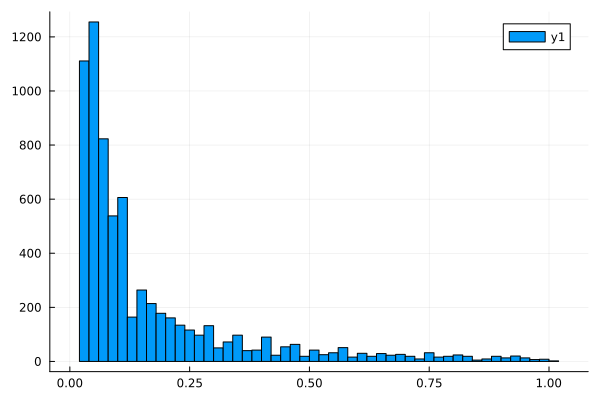

In [7]:
histogram(τ)

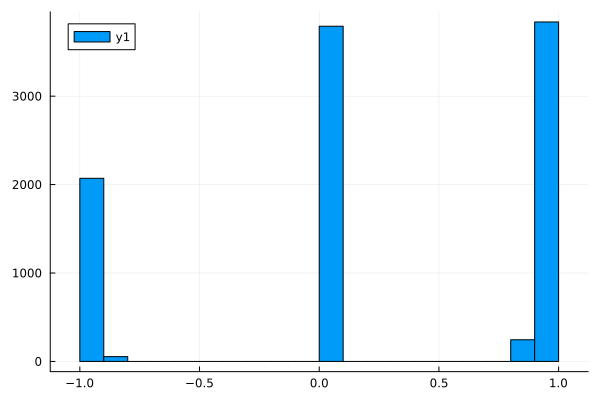

In [8]:
histogram(V)

How many times the payoff is close to $0$:

In [9]:
sum((V .< 0.00001) .& (V .> -0.00001))

3791

How many times $\tau$ had an infinite value:

In [10]:
sum(τ .== Inf)

3130